#### Climatic variability and longterm erosion rate
Let us assume a general form of the instantaneous erosion law:
\begin{equation}
\varepsilon = (x(p) - \Psi_c)^\gamma,
\end{equation}
where $x(p)$ is a applied force such as shear stress or pore pressure that results from instantaneous rainfall $p$ and $\Psi_c$ is a threshold that needs to be exceeded before the applied force causes erosion. The exponent $\gamma$ expresses the nonlinearity between the applied force and the resulting erosion. In this simple framework various thresholds and nonlinearities can be accounted for, allowing this equation to be applied to many systems.

We investigate the effect of short term variability on this formulation by pairing the equation with a probability distribution for $p$.
\begin{equation}
f_X(x) = \frac{k^k}{\Gamma(k)} x_{*}^{k-1} e^{-kx_*},
\end{equation}
where $x_* = x/\langle X \rangle$ is the applied force normalised by the mean. We have chosen a gamma distribution, but any distribution could be used.
The resulting longterm erosion rate is then:
\begin{equation}
\langle E \rangle = \int_{0}^\infty f_X(x)\varepsilon(x) \textrm{d}x = \int_{0}^\infty f_X(x)[x(p) - \Psi_c]^\gamma \textrm{d}x
\end{equation}
We can separate the effect of the threshold removing events below it from the effect of the threshold and the nonlinearity affecting the impact of events above the threshold, writing the longterm erosion rate as,
\begin{equation}
\langle E \rangle = \lambda_\varepsilon\psi\langle X \rangle.
\end{equation}
Where the term $\lambda_\varepsilon$ describes the impact of removing events below the threshold, and $\psi$ describes the effect of the nonlinearity and the threshold on events above the threshold. We can see that these two terms are simply coefficients that describe difference between the linear average over $x$ and the nonlinear one that results in $ \langle E \rangle $. The "erosion frequency" $ \lambda_\varepsilon $ is simply equal to the probability to be above the erosion threshold $\textrm{Pr}[x\geq\Psi_c]$. In the case of the gamma distribution this is,
\begin{equation}
\lambda_\varepsilon = \Gamma(k, kx_*)
\end{equation}
The threshold term $\psi$ is equal to the mean erosion rate given that erosion occurs, normalized by the mean forcing,
\begin{equation}
\psi = \frac{1}{\langle X \rangle} \int_{\Psi_c}^{\infty} f_X(x)[x(p) - \Psi_c]^\gamma \textrm{d}x
\end{equation}
We can calculate an erosion efficiency, which can be thought of as the amount of erosion accomplished per unit of applied forcing,
\begin{equation}
\eta_\varepsilon = \frac{\langle E \rangle}{\langle X \rangle} = \lambda_\varepsilon\psi
\end{equation}

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import numpy as np, scipy.special as ss, scipy.integrate as integrate, matplotlib.pyplot as plt, seaborn as sns
import deal_fig_style as dfs
figsize = dfs.set_style(plt.rcParams, plt.gca())
plt.close()

In [2]:
def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

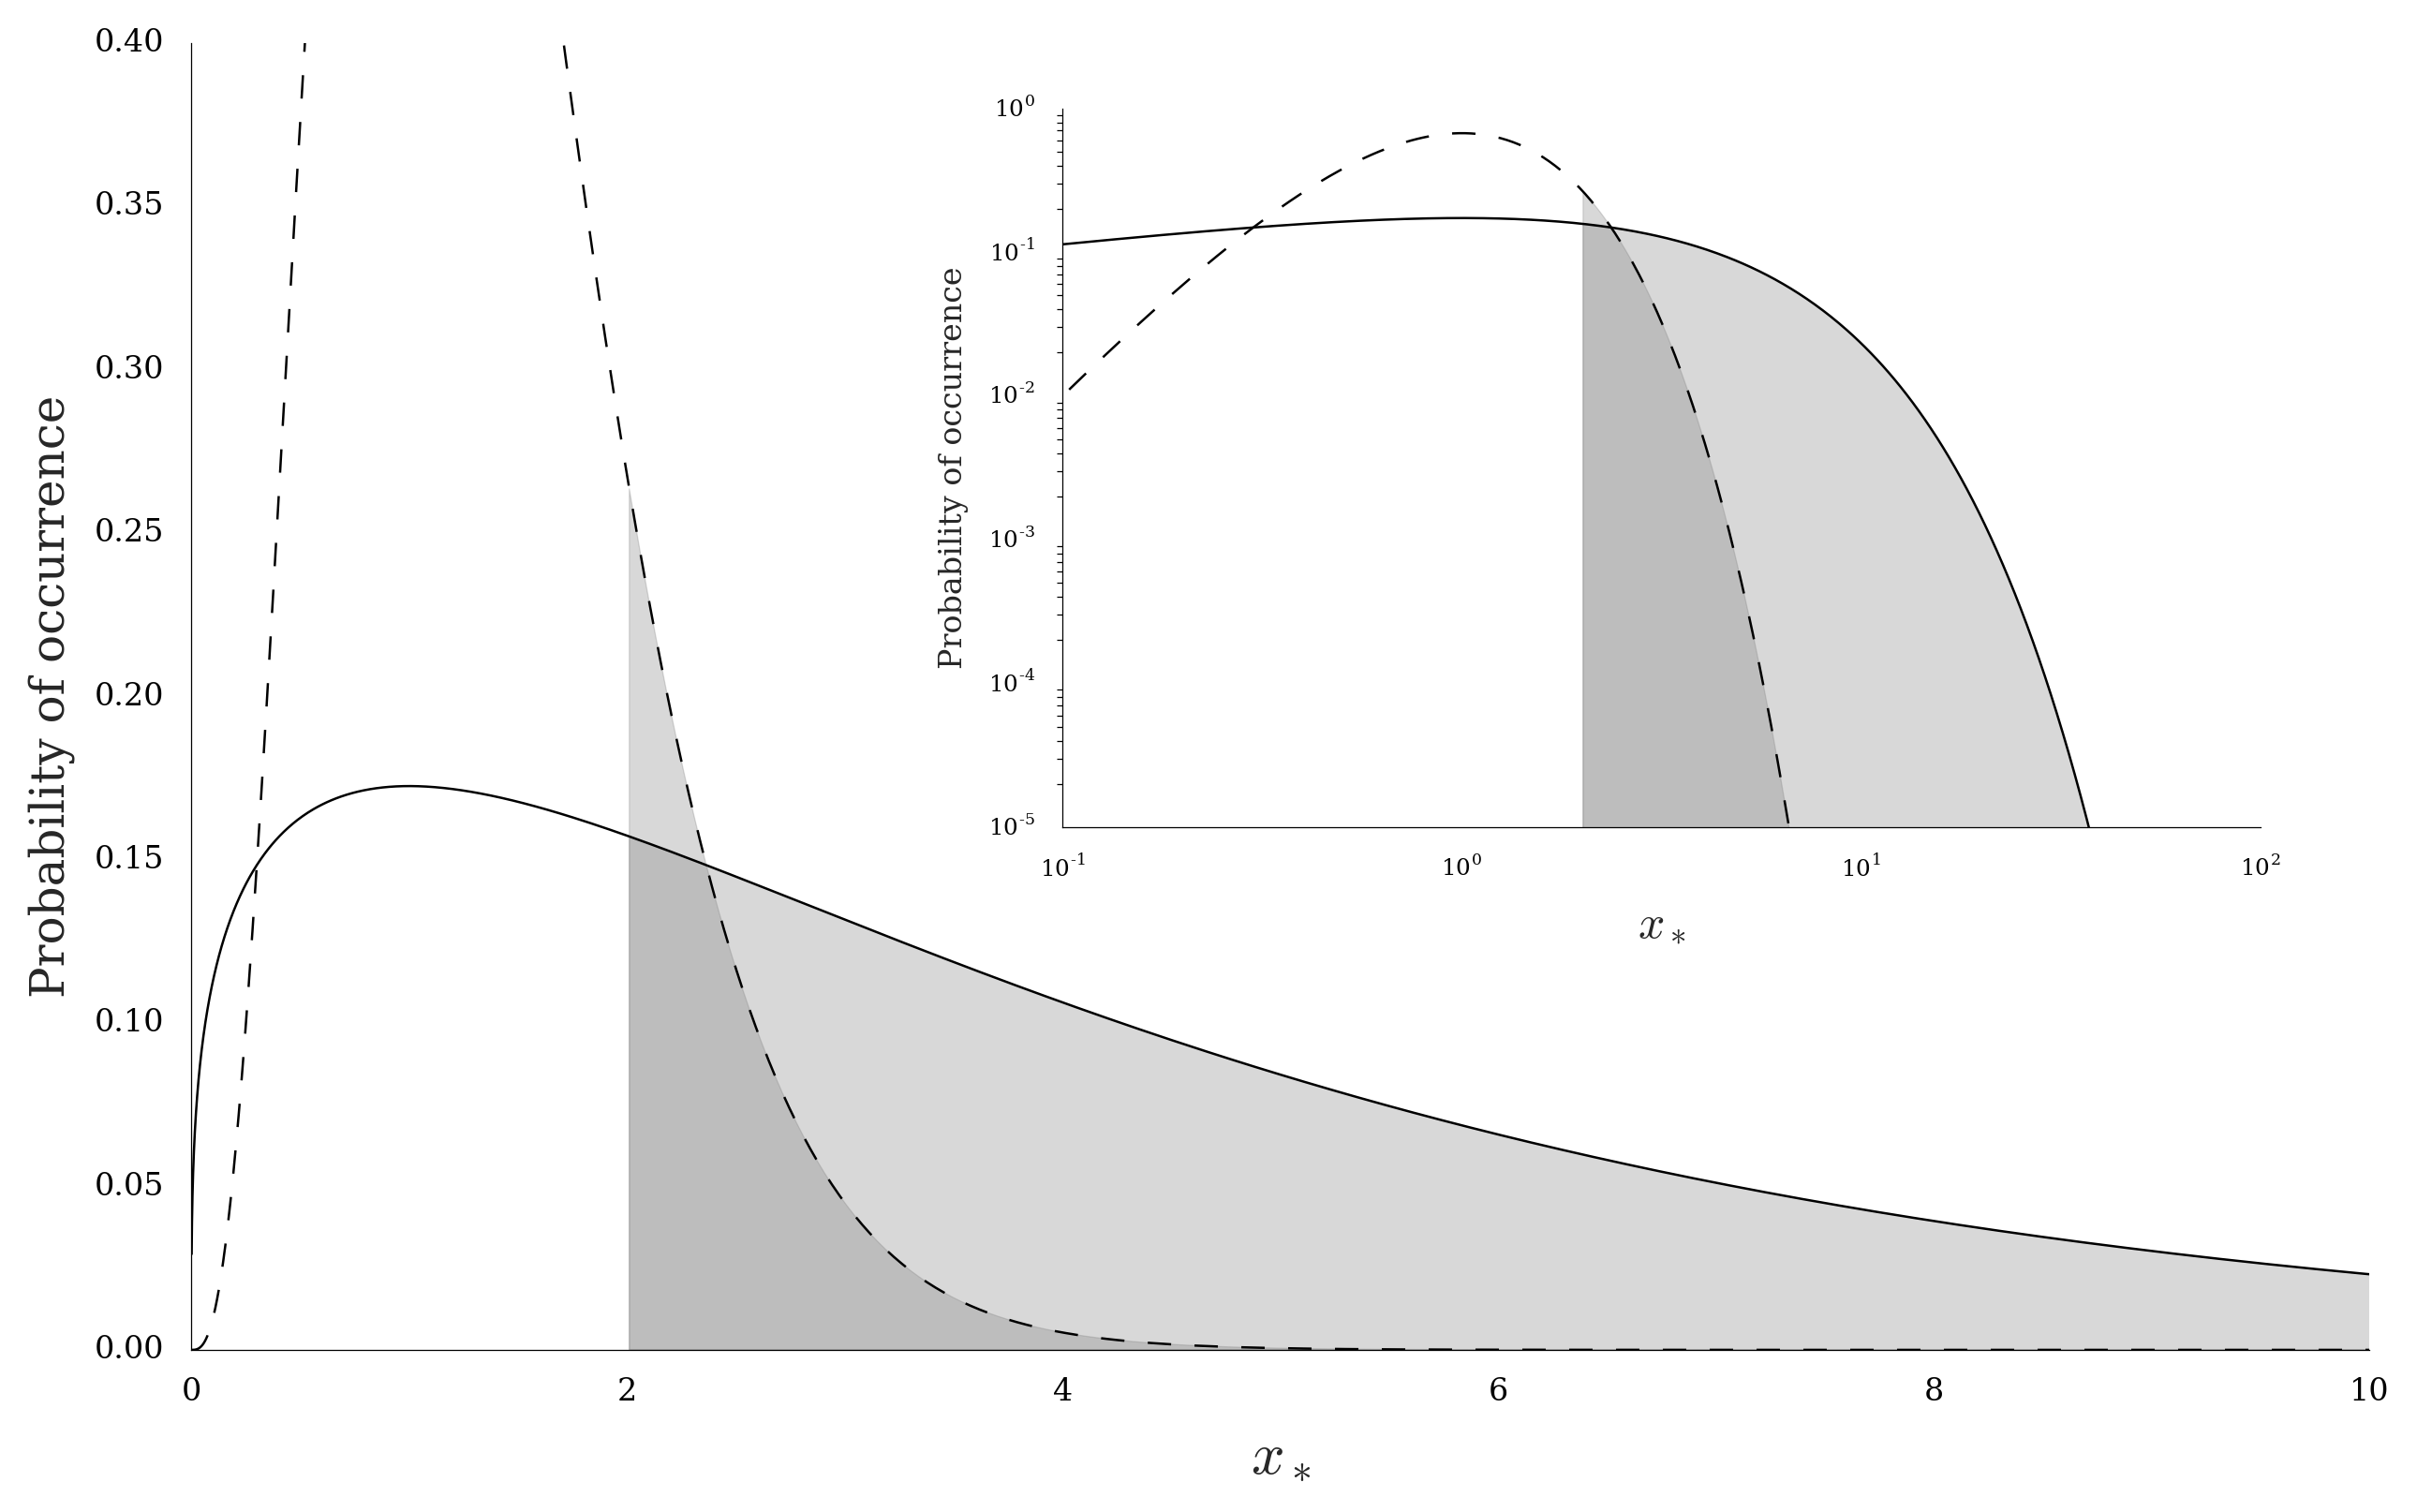

In [3]:
# define parameters
fig = plt.figure(figsize=(2*figsize[0], figsize[1]))
psic_8 = 2.
y = 1.
X = 10.
psic = psic_8*X
ks = [0.3, 3]
n = 1000
x = np.logspace(-2, 3, n)

fig = plt.figure()
ax = fig.add_subplot(111)
ls = {0.3: '-', 3: '--'}
for k in ks:
    # define probability distribution
    # f = lambda t: ((k**k)/ss.gamma(k)) * np.exp(-k*X/x) * (x/P)**(-c-2.)
    f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*x/X) * (x/X)**(k-1.)
    ax.plot(x/X, (x/X)*f(x), ls=ls[k], color='k')
    ax.fill_between(x/X, (x/X)*f(x), 1e-100*np.ones(n), where=(x>psic), alpha=0.3, color='gray')
    ax.set_ylim([0,.4])
    ax.set_xlim([0, 10])
    ax.set_xlabel('$x_*$', fontsize=15)
    ax.set_ylabel('Probability of occurrence', fontsize=12)
    sns.despine()
    
ax1 = add_subplot_axes(ax, [0.4,0.4,0.55,0.55])
for k in ks:
    # define probability distribution
    # f = lambda t: ((k**k)/ss.gamma(k)) * np.exp(-k*X/x) * (x/P)**(-c-2.)
    f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*x/X) * (x/X)**(k-1.)
    ax1.loglog(x/X, (x/X)*f(x), ls=ls[k], color='k')
    ax1.fill_between(x/X, (x/X)*f(x), 1e-100*np.ones(n), where=(x>psic), alpha=0.3, color='gray')
    ax1.set_ylim([1e-5,1])
    ax1.set_xlim([0.1, 100])    
    ax1.set_xlabel('$x_*$', fontsize=12)
    ax1.set_ylabel('Probability of occurrence', fontsize=8)
    sns.despine()

plt.savefig('dist_w_threshold.pdf', dpi=600, format='pdf')


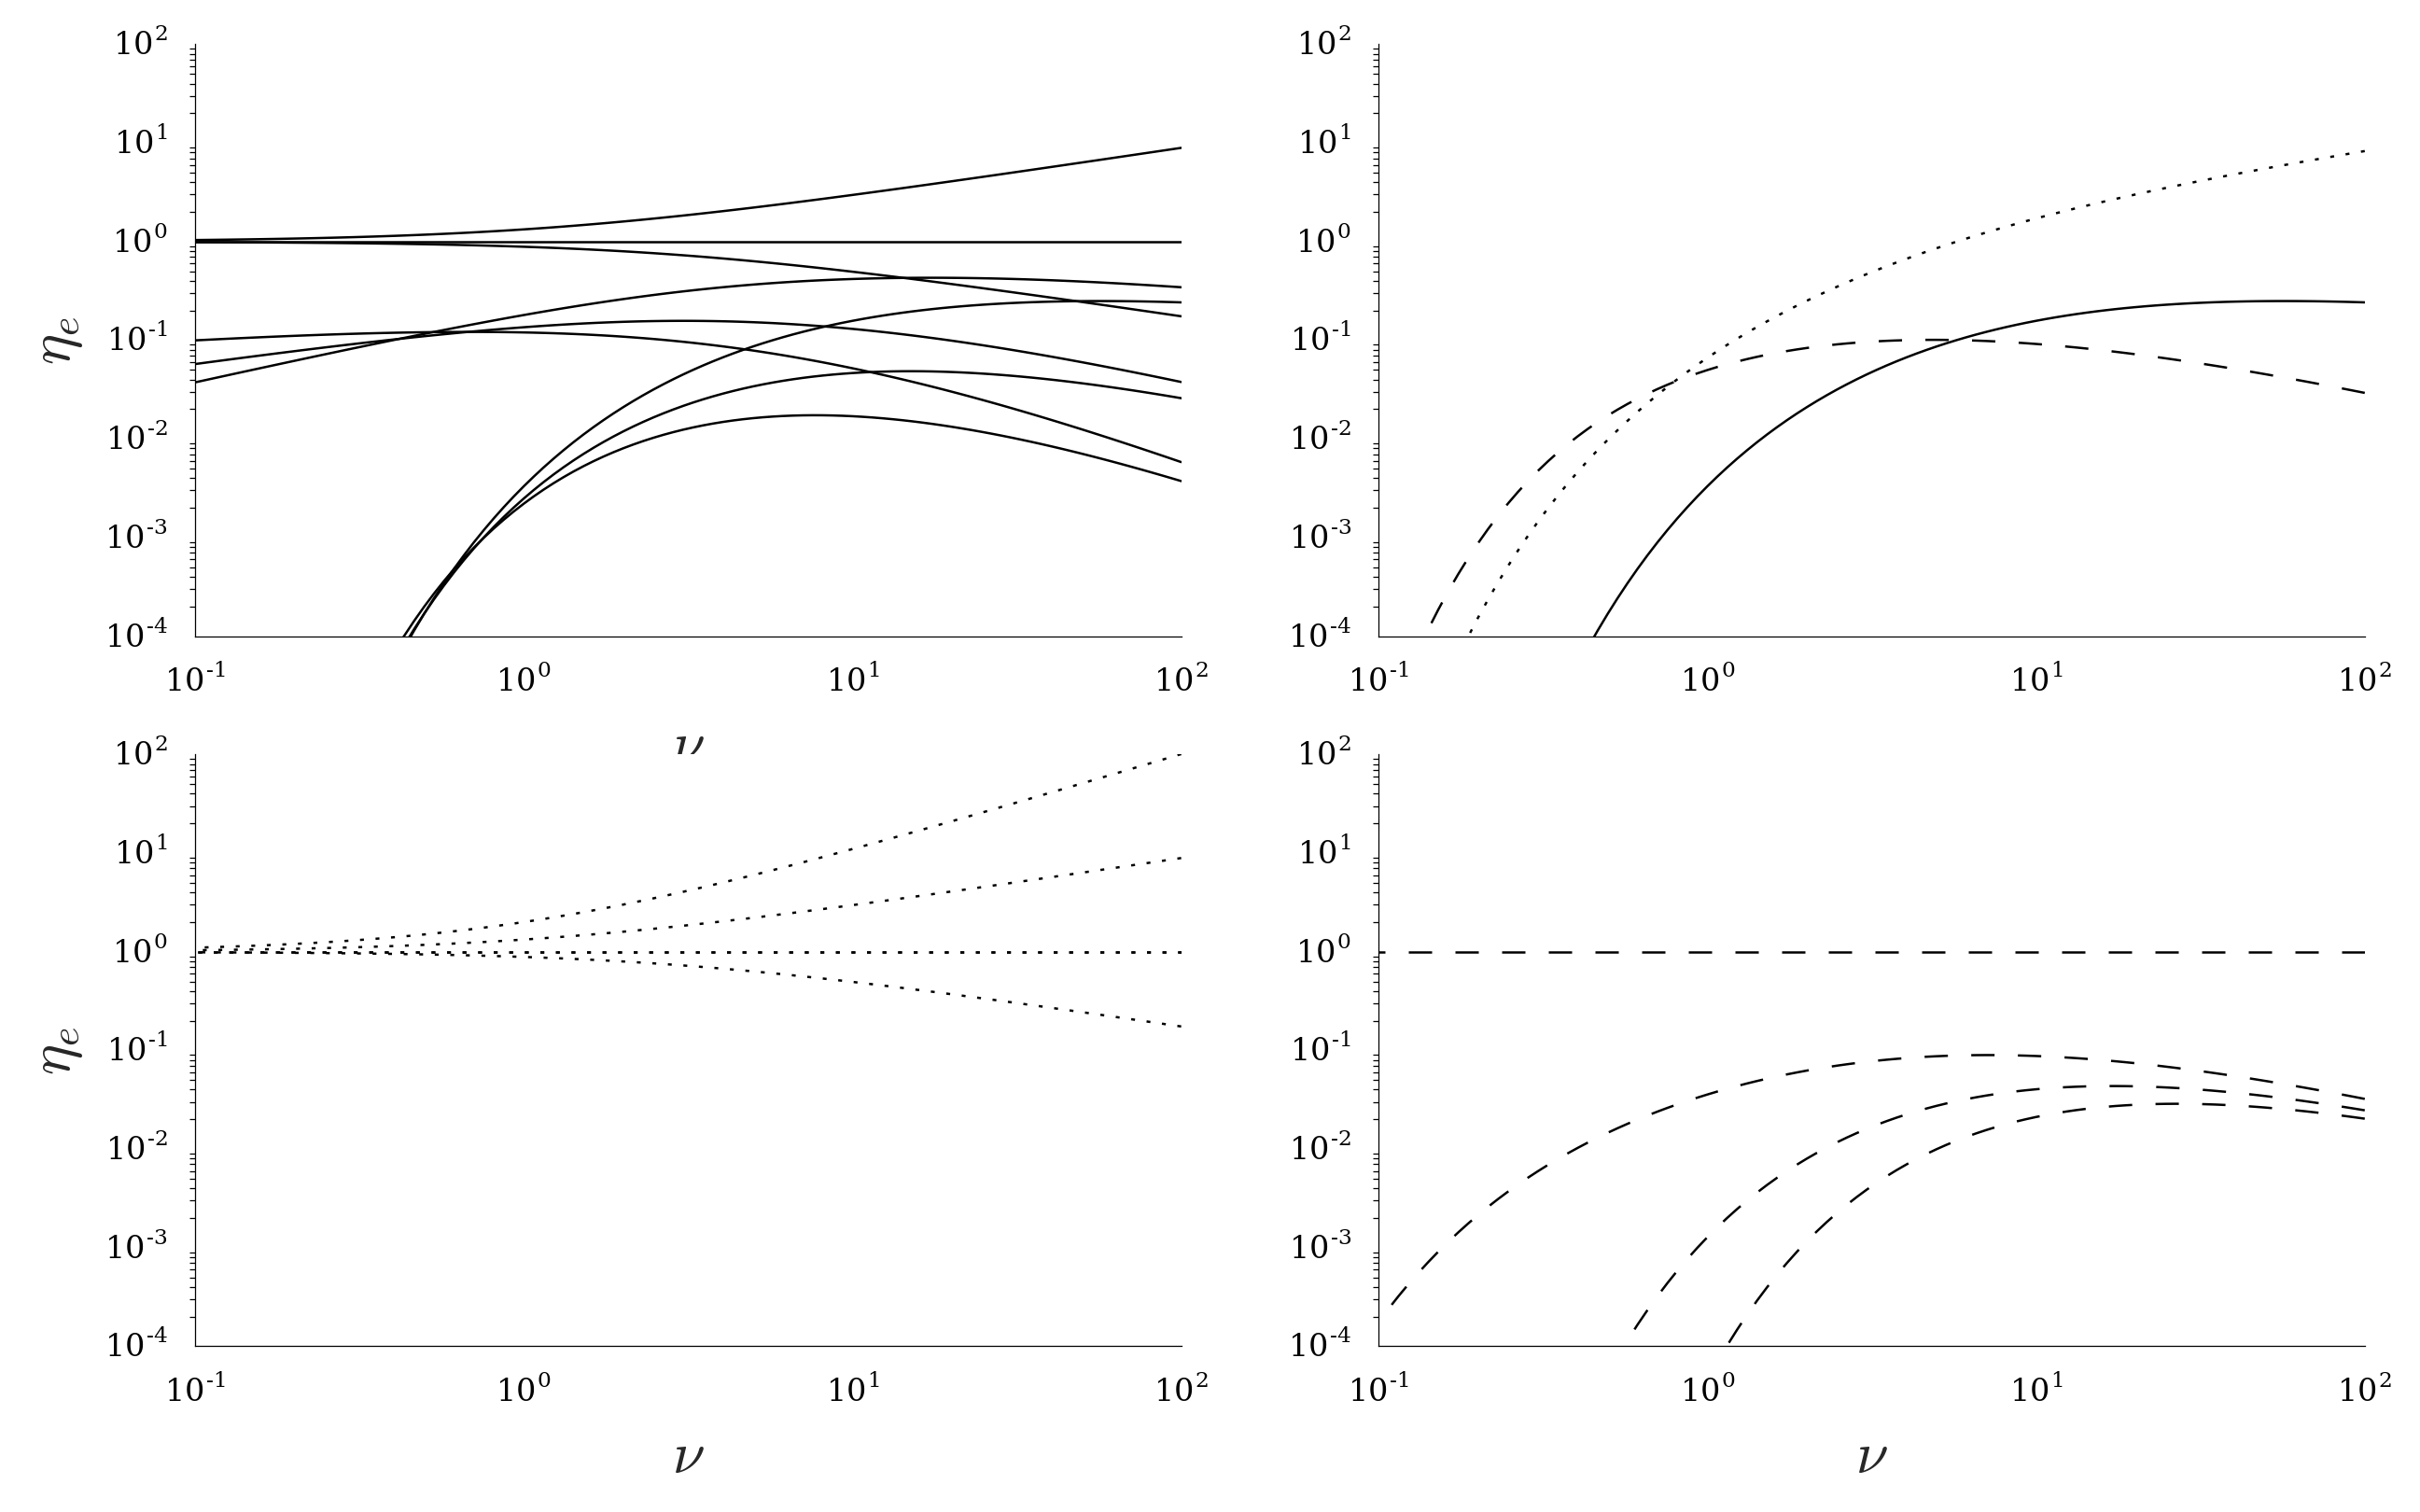

In [4]:
# define parameters
fig = plt.figure(figsize=(2*figsize[0], figsize[1]))
X = 1.
psic_8 = 0
psic_8s = np.asarray([0, 1., 3.])
psic = psic_8*X
psics = psic_8s*X
y = 1.
ys = np.asarray([0.5, 1., 1.5])
ks = np.logspace(-2,1,100)

# plot one
fig = plt.figure()
ax1 = fig.add_subplot(221)
for psic in psics:
    for y in ys:
        # define probability distribution
        # f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*X/x) * (x/X)**(-k-2.)
        f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*x/X) * (x/X)**(k-1.)

        # define erosion law
        e = lambda x: (x - psic)**y
        freq = np.asarray([ss.gammaincc(k, k*psic/X) for k in ks])
        E = freq*np.asarray([integrate.quad(lambda x: f(x)*e(x/X), psic/X, np.inf)[0] for k in ks])
        ax1.loglog(1./ks, E/X, 'k')
        
ax1.set_ylim([1e-4, 1e2])
ax1.set_xlabel(r'$\nu$', fontsize=15)
ax1.set_ylabel('$\eta_e$', fontsize=15)
sns.despine()

# plot two
psic_8 = 0
psic = psic_8*X
y = 1.
psic_8s = np.asarray([3.])
psics = psic_8s*X
ys = np.asarray([1.5])
ax2 = fig.add_subplot(222)
for psic in psics:
    for y in ys:
        # define probability distribution
        # f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*X/x) * (x/X)**(-k-2.)
        f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*x/X) * (x/X)**(k-1.)

        # define erosion law
        e = lambda x: (x - psic)**y
        freq = np.asarray([ss.gammaincc(k, k*psic/X) for k in ks])
        E = freq*np.asarray([integrate.quad(lambda x: f(x)*e(x/X), psic/X, np.inf)[0] for k in ks])
        
        ax2.loglog(1./ks, freq, color='k', ls='--')
        
        threshold = np.asarray((1./X)*np.asarray([integrate.quad(lambda x: f(x)*e(x/X), psic/X, np.inf)[0] for k in ks]))
        ax2.loglog(1./ks, threshold, color='k', ls=':')
        
        ax2.loglog(1./ks, E/X, 'k')

ax2.set_ylim([1e-4, 1e2])
# ax2.set_xlabel(r'$\nu$', fontsize=15)
# ax2.set_ylabel('$\eta_e$', fontsize=15)
sns.despine()

# plot three
psic_8 = 0
psic = psic_8*X
y = 1.
ys = np.linspace(0,2,5)
ax3 = fig.add_subplot(223)
for y in ys:
    # define probability distribution
    # f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*X/x) * (x/X)**(-k-2.)
    f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*x/X) * (x/X)**(k-1.)

    # define erosion law
    e = lambda x: (x - psic)**y
    freq = np.asarray([ss.gammaincc(k, k*psic/X) for k in ks])
    E = freq*np.asarray([integrate.quad(lambda x: f(x)*e(x/X), psic_8, np.inf)[0] for k in ks])
    ax3.loglog(1./ks, E/X, color='k', ls=':')

ax3.set_ylim([1e-4, 1e2])
ax3.set_xlabel(r'$\nu$', fontsize=15)
ax3.set_ylabel('$\eta_e$', fontsize=15)
sns.despine()

# plot four
psic_8 = 0
psic = psic_8*X
y = 1.
psic_8s = np.linspace(0,5,4)
psics = psic_8s*X
ax4 = fig.add_subplot(224)
for psic in psics:
    # define probability distribution
#     f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*X/x) * (x/X)**(-k-2.)
    f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*x/X) * (x/X)**(k-1.)

    # define erosion law
    e = lambda x: (x - psic)**y
    freq = np.asarray([ss.gammaincc(k, k*psic/X) for k in ks])
    E = freq*np.asarray([integrate.quad(lambda x: f(x)*e(x/X), psic/X, np.inf)[0] for k in ks])
    plt.loglog(1./ks, E/X, color='k', ls='--')

ax4.set_ylim([1e-4, 1e2])
ax4.set_xlabel(r'$\nu$', fontsize=15)
# ax4.set_ylabel('$\eta_e$', fontsize=15)
sns.despine()
plt.savefig('threshold_nonlin_effects.pdf', dpi=600, format='pdf')



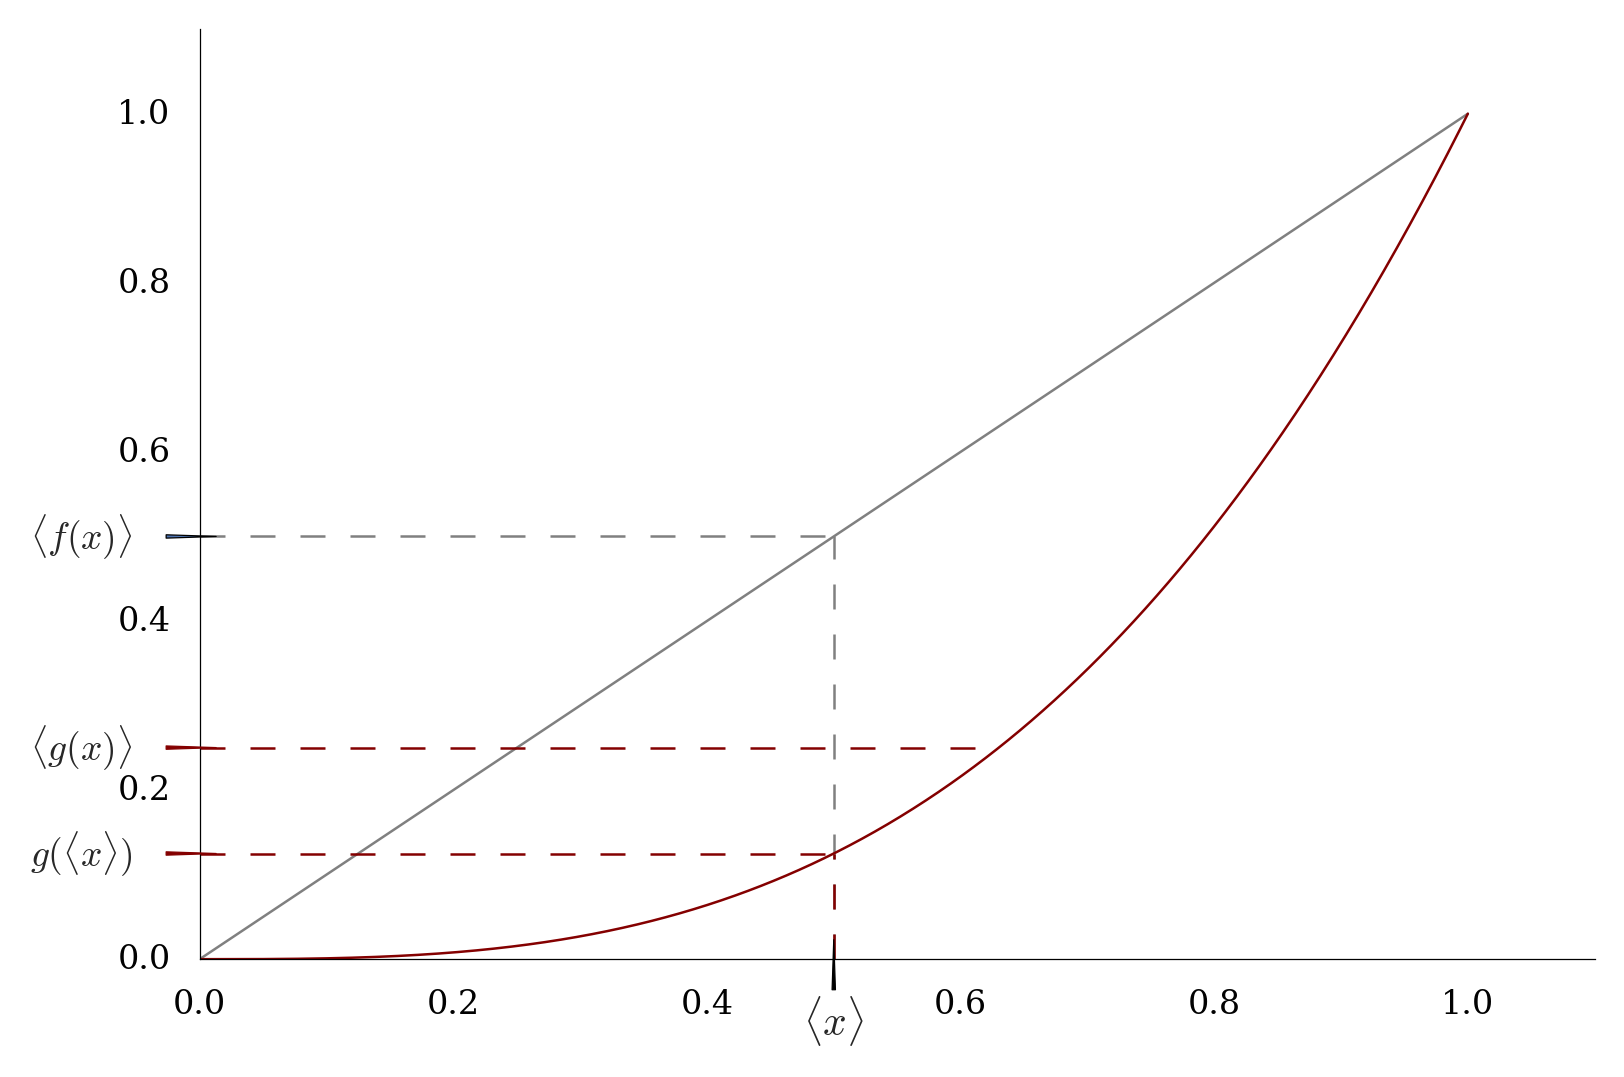

In [5]:
fig = plt.figure(figsize=(figsize[0], figsize[1]))
f = lambda x: x
fcolor = 'gray'
g = lambda x: x**3
gcolor = sns.xkcd_rgb['dark red']
n = 1000
x = np.linspace(0,1,n)

plt.plot(x, f(x), color=fcolor)
plt.plot(x[x<x.mean()], f(x).mean()*np.ones(n)[x<x.mean()], color=fcolor, ls='--')
plt.plot(np.ones(10)*x.mean(), np.linspace(0,f(x).mean(),10), color=fcolor, ls='--')

plt.plot(x, g(x), color=gcolor)
plt.plot(x[x<g(x).mean()**(0.3333)], g(x).mean()*np.ones(n)[x<g(x).mean()**(0.3333)], 
         color=gcolor, ls='--')
# plt.plot(np.ones(10)*g(x).mean()**(0.5), np.linspace(0,g(x).mean(),10), 
#          color=gcolor, ls='--')
plt.plot(x[x<x.mean()], g(x.mean())*np.ones(n)[x<x.mean()], 
         color=gcolor, ls='--')
plt.plot(np.ones(10)*x.mean(), np.linspace(0,g(x.mean()),10), 
         color=gcolor, ls='--')
plt.xlim([0,1.1])
plt.ylim([0,1.1])
sns.despine()

plt.annotate(r'$\langle g(x) \rangle$ ', 
             xy=(0.04,g(x).mean()), 
             xytext=(-0.05, g(x).mean()), 
             xycoords='data', 
             fontsize=9,
             ha='right', va='center',
             arrowprops={'width': .8, 'headwidth': .8, 'color': gcolor, 'shrink': 0.3, 'frac':0})
plt.annotate(r'$g(\langle x \rangle)$ ', 
             xy=(0.04,g(x.mean())), 
             xytext=(-0.05, g(x.mean())), 
             xycoords='data', 
             fontsize=9,
             ha='right', va='center',
             arrowprops={'width': .8, 'headwidth': .8, 'color': gcolor, 'shrink': 0.3, 'frac':0})
plt.annotate(r'$\langle f(x) \rangle$ ', 
             xy=(0.04,f(x).mean()), 
             xytext=(-0.05, f(x).mean()), 
             xycoords='data', 
             fontsize=9,
             ha='right', va='center',
             arrowprops={'width': .8, 'headwidth': .8, 'edgecolor': None, 'shrink': 0.3, 'frac':0.01})
plt.annotate(r'$\langle x \rangle$', 
             xy=(x.mean(), 0.05), 
             xytext=(x.mean(), -0.04), 
             xycoords='data', 
             fontsize=10,
             ha='center', va='top',
             arrowprops={'width': .8, 'headwidth': .8, 'color': 'k', 'shrink': 0.3, 'frac':0})

plt.savefig('mean_example.pdf', dpi=600, format='pdf')

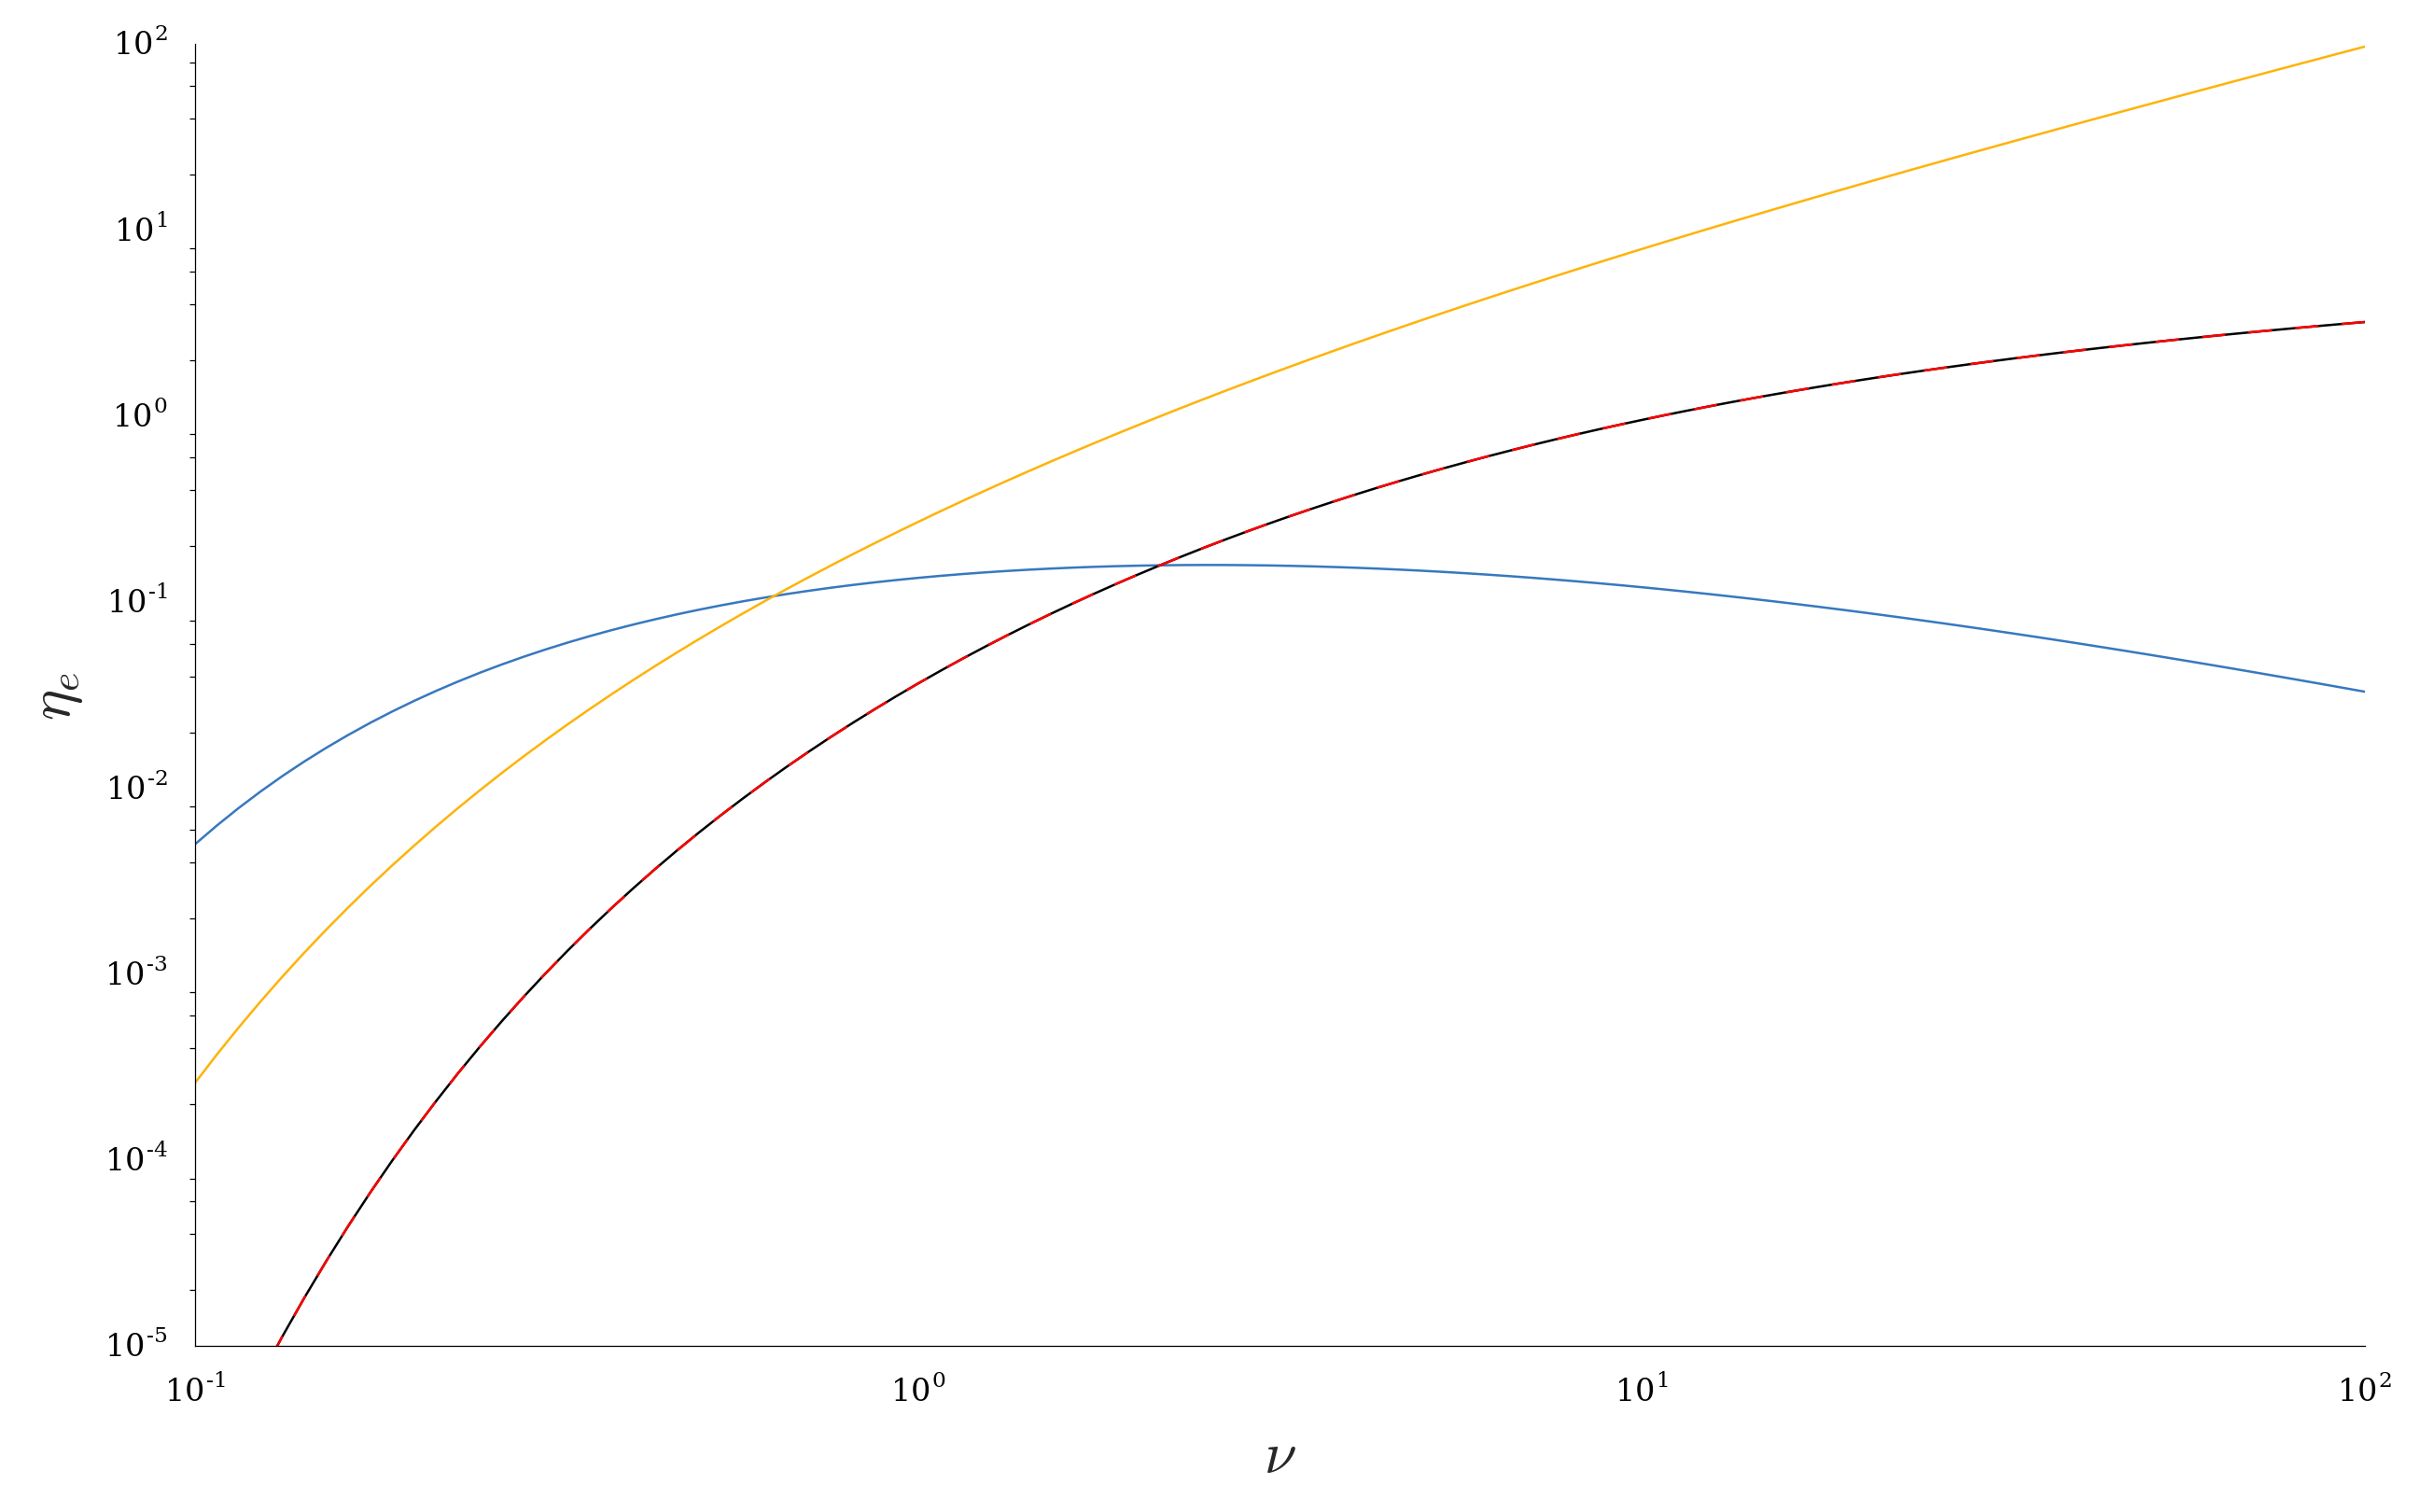

In [6]:
# define parameters
psic_8s = np.asarray([2.])
ys = np.asarray([2.])
X = 1.
psics = psic_8s*X
ks = np.logspace(-2,1,100)
x = np.logspace(-2, 3, 100)

for psic in psics:
    for y in ys:
        # define probability distribution
        # f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*X/x) * (x/X)**(-k-2.)
        f = lambda x: ((k**k)/ss.gamma(k)) * np.exp(-k*x/X) * (x/X)**(k-1.)

        # define erosion law
        e = lambda x: (x - psic)**y
        freq = np.asarray([ss.gammaincc(k, k*psic/X) for k in ks])
        E = freq*np.asarray([integrate.quad(lambda x: f(x)*e(x/X), psic/X, np.inf)[0] for k in ks])
        
        plt.loglog(1./ks, freq)
        
        threshold = np.asarray((1./X)*np.asarray([integrate.quad(lambda x: f(x)*e(x/X), psic/X, np.inf)[0] for k in ks]))
        plt.loglog(1./ks, threshold)
        
        plt.loglog(1./ks, E/X, 'k')
        plt.loglog(1./ks, threshold*freq, 'r--')
        
# plt.plot(1./cs, E1, 'g+', ms=10)
# plt.loglog(1./cs, E2, 'bx')
plt.ylim([1e-5, 1e2])
plt.xlabel(r'$\nu$', fontsize=15)
plt.ylabel('$\eta_e$', fontsize=15)
sns.despine()